#Installing Data

# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/STOCK PRICE PRED/NSE_train.csv'
df_train = pd.read_csv(filepath)
df_train = df_train.sort_values('Date')

#print some rows
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [ ]:
filepath = '/content/drive/MyDrive/STOCK PRICE PRED/NSE_test.csv'
df_test = pd.read_csv(filepath)
df_test = df_test.sort_values('Date')

#print some rows
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000
1,2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2,2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900
3,2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200
4,2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       991 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.2+ KB


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,15822.760745,15900.697561,15716.523084,15812.712220,15812.712220,4.038158e+05
std,3121.117024,3112.728627,3130.668302,3124.026557,3124.026557,2.194238e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,13812.775391,13932.549805,13693.399902,13845.375000,13845.375000,2.488500e+05
50%,16933.250000,17062.449219,16820.400391,16945.050781,16945.050781,3.147000e+05
75%,17974.149414,18085.950195,17881.924805,17995.674805,17995.674805,5.434000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.811000e+06


In [ ]:
df_train.Date.iloc[0],df_train.Date.iloc[-1]

('2020-01-01', '2023-12-29')

In [ ]:
df_test.Date.iloc[0],df_test.Date.iloc[-1]

('2024-01-01', '2024-03-14')

# EDA

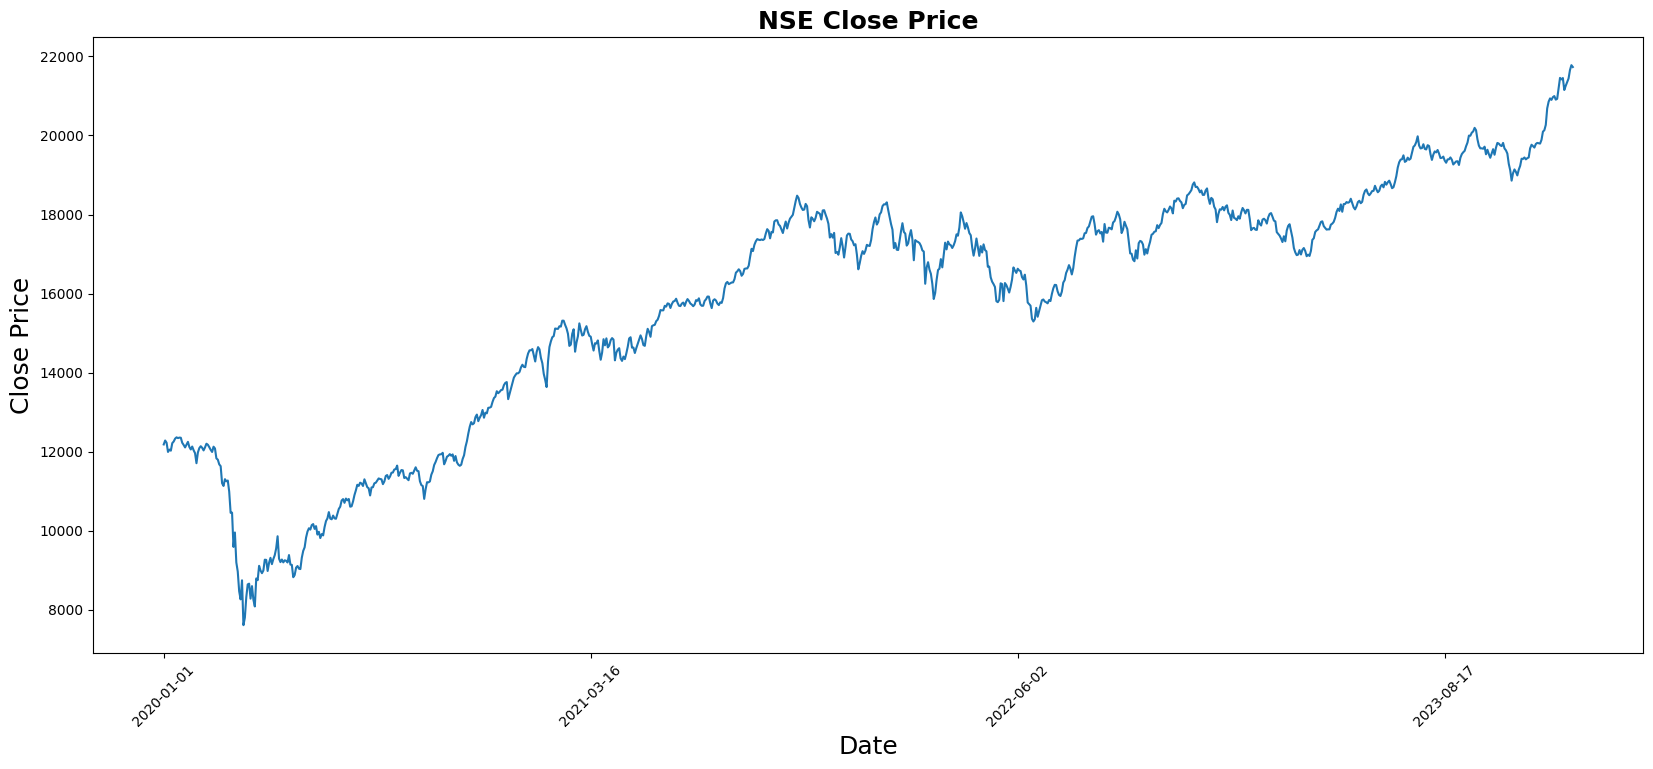

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df_train[['Close']])
plt.xticks(range(0,df_train.shape[0],300),df_train['Date'].loc[::300],rotation=45)
plt.title("NSE Close Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

# Data Preprocessing

In [ ]:
price_train = df_train[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
print(price_train.head())
print(price_train.shape)

price_test = df_test[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))
# print(price_test.head())
print(price_test.shape)

      Close
0 -0.354587
1 -0.340514
2 -0.348355
3 -0.381330
4 -0.372874
(991, 1)
(51, 1)


<ipython-input-9-bc75253471e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
<ipython-input-9-bc75253471e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))


In [ ]:
def split_data(stock_tr,stock_ts, lookback):
    data_raw_tr = stock_tr.to_numpy()
    data_tr = []
    for index in range(len(data_raw_tr) - lookback):
        data_tr.append(data_raw_tr[index: index + lookback])

    data_raw_ts = stock_ts#.to_numpy()
    data_ts = []

    for index in range(len(data_raw_ts) - lookback):
        data_ts.append(data_raw_ts[index: index + lookback])

    data_tr = np.array(data_tr);
    data_ts = np.array(data_ts);

    x_train = data_tr[:,:-1,:]
    y_train = data_tr[:,-1,:]

    x_test = data_ts[:,:-1]
    y_test = data_ts[:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [ ]:
# lookback = 7
# x_train, y_train, x_test, y_test = split_data(df_train[['Close']],df_test[['Close']].values, lookback)
# x_train[0], y_train[0]

In [ ]:
lookback = 7
x_train, y_train, x_test, y_test = split_data(price_train,price_test, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (984, 6, 1)
y_train.shape =  (984, 1)
x_test.shape =  (44, 6, 1)
y_test.shape =  (44, 1)


In [ ]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)

x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
x_train[0], y_train[0]

(tensor([[-0.3546],
         [-0.3405],
         [-0.3484],
         [-0.3813],
         [-0.3729],
         [-0.3768]]),
 array([-0.34987234]))

In [ ]:
input_dim = 1
output_dim = 1

hidden_dim = 16
num_layers = 4
num_epochs = 200

# Create the Transformers model

In [ ]:
# TensorDataset : allows us to use our own data
# DataLoader : wraps an iterable around the Dataset to enable easy access to the samples

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(x_train, y_train_lstm)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(x_test, y_test_lstm)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class Transformer(nn.Module): ##inherits the nn module i.e the Neural Net module
    """
    feature size : Number of features
    num_layers : No. of transformer layers
    dropout : Dropout probability
    """

    def __init__(self,input_dim=1,feature_size=8,num_layers=3,dropout=0):

        # calls the constructor of the parent class
        super(Transformer, self).__init__()

        # taking the input
        self.encoder = nn.Linear(input_dim, feature_size)

        # represents the single layer of the transformer encoder which includes the multi-head self-attention and feed-forward neural network.
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=4, dropout=dropout)

        # stacks the multiple encoder layer using num_layers
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        # maps the transformer output to a single output
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    ## initializes the weights and biases
    def init_weights(self):
        initrange = 0.1 # range of -0.1 to 0.1
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    # square subsequent mask is a binary mask used in self attention
    # ensures that during self attention,each pos in self attention attends to the positions before it
    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src, device):
        # ensuring that the operations are done on cuda device
        src = src.to(device)

        src = self.encoder(src)

        # genrates the subsequent mask for input src
        mask = self._generate_square_subsequent_mask(len(src)).to(device)

        # passes the input seq src  thru the transformer encoder applying the mask and each layer includes self-attention and feed-forward neural network.
        output = self.transformer_encoder(src,mask)

        # passes transformer output thru linear layer to prod final output
        output = self.decoder(output[:, -1, :])

        return output

#ensuring the model runs on GPU
model = Transformer()#.to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Training

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

"""Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10
once learning stagnates. This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs,
the learning rate is reduced."""
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=3, verbose=True)

epochs = 100
early_stop_count = 0
hist = np.zeros(epochs)

min_val_loss = float('inf')

for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        x_batch, y_batch = batch
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch,device)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for batch in test_loader:
            x_batch, y_batch = batch
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch,device)
            loss = criterion(outputs, y_batch)
            val_losses.append(loss.item())

    val_loss = np.mean(val_losses)
    hist[epoch] = val_loss
    scheduler.step(val_loss)

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= 5:
        print("Early stopping!")
        break
    print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {val_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/100, Validation Loss: 0.1360
Epoch 2/100, Validation Loss: 0.1009
Epoch 3/100, Validation Loss: 0.0992
Epoch 4/100, Validation Loss: 0.0966
Epoch 5/100, Validation Loss: 0.0933
Epoch 6/100, Validation Loss: 0.0925
Epoch 7/100, Validation Loss: 0.0886
Epoch 8/100, Validation Loss: 0.0878
Epoch 9/100, Validation Loss: 0.0847
Epoch 10/100, Validation Loss: 0.0844
Epoch 11/100, Validation Loss: 0.0848
Epoch 12/100, Validation Loss: 0.0824
Epoch 13/100, Validation Loss: 0.0813
Epoch 14/100, Validation Loss: 0.0809
Epoch 15/100, Validation Loss: 0.0806
Epoch 16/100, Validation Loss: 0.0799
Epoch 17/100, Validation Loss: 0.0799
Epoch 18/100, Validation Loss: 0.0795
Epoch 19/100, Validation Loss: 0.0786
Epoch 20/100, Validation Loss: 0.0779
Epoch 21/100, Validation Loss: 0.0783
Epoch 22/100, Validation Loss: 0.0782
Epoch 23/100, Validation Loss: 0.0779
Epoch 24/100, Validation Loss: 0.0769
Epoch 25/100, Validation Loss: 0.0771
Epoch 26/100, Validation Loss: 0.0768
Epoch 27/100, Validat

# Prediction

In [ ]:
# Evaluation
model.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.to(device)
        outputs = model(x_batch,device)
        predictions.extend(outputs.squeeze().tolist())

rmse = np.sqrt(np.mean((scaler.inverse_transform(np.array(predictions).reshape(-1, 1)) - scaler.inverse_transform(y_test_lstm.numpy().reshape(-1, 1)))**2))
print(f"Score (RMSE): {rmse:.4f}")

Score (RMSE): 173.3249


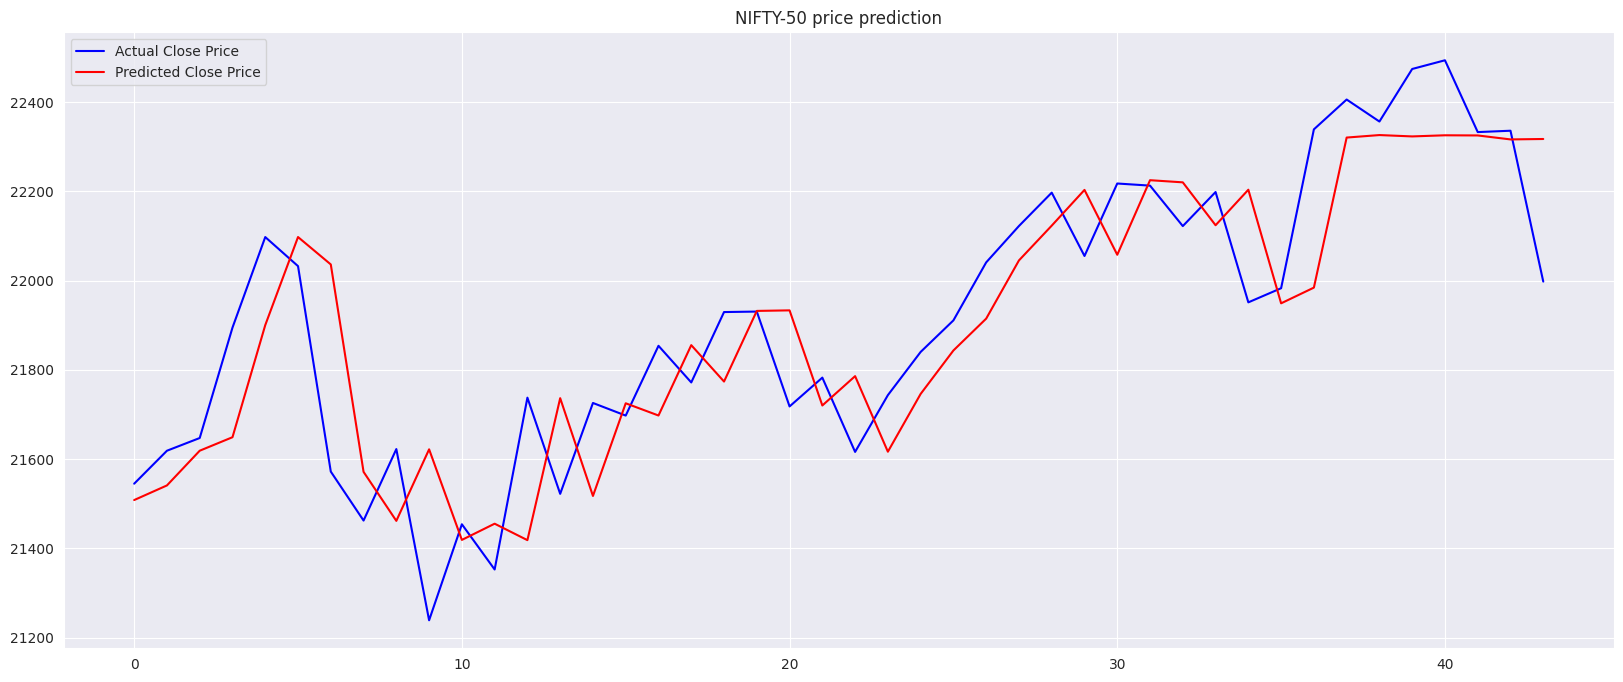

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

predict = pd.DataFrame(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
original = pd.DataFrame(scaler.inverse_transform(y_test_lstm))

fig, ax = plt.subplots(figsize=(20, 8))
# ax.scatter(, test_df['Close'], color='red')

plt.plot(pd.to_datetime(test_df['Date']),original[0], color = 'blue', label = 'Actual Close Price')
plt.plot(pd.to_datetime(test_df['Date']),predict[0], color = 'red', label = 'Predicted Close Price')
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.title('NIFTY-50 price prediction')
plt.legend()
plt.show()

# LOSS

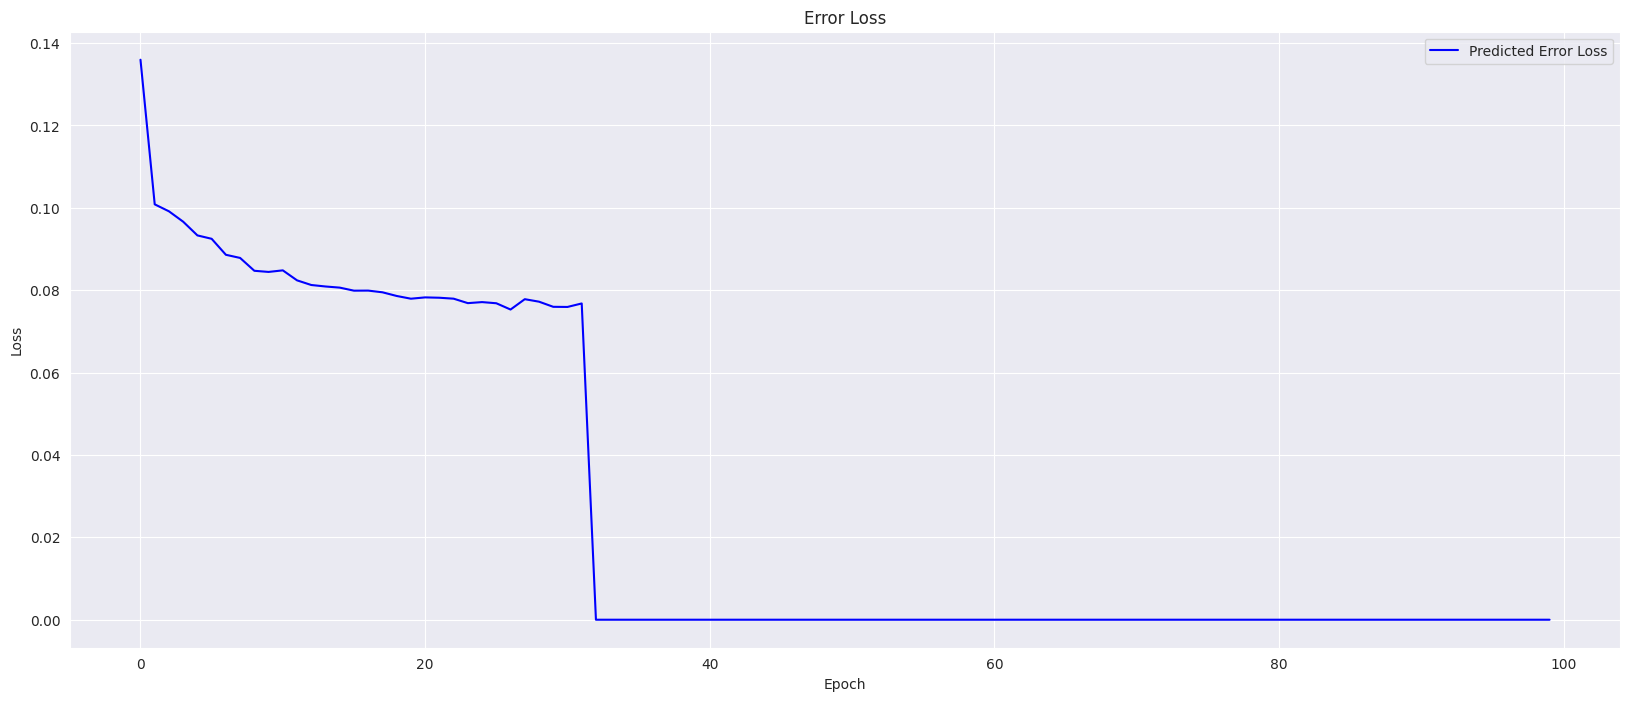

In [ ]:
epochs = np.arange(100)
plt.figure(figsize=(20,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/STOCK PRICE PRED/transformer_ts2.pth")

In [ ]:
torch.save(model, '/content/drive/MyDrive/STOCK PRICE PRED/transformer2.pt')

# Load the saved model

In [ ]:
model = torch.load('/content/drive/MyDrive/STOCK PRICE PRED/transformer2.pt')

In [ ]:
model2 = Transformer() # rename as model2
model2.load_state_dict(torch.load("/content/drive/MyDrive/STOCK PRICE PRED/transformer_ts2.pth"))
model2.to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Transformer(
  (encoder): Linear(in_features=1, out_features=8, bias=True)
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
    )
    (linear1): Linear(in_features=8, out_features=2048, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (linear2): Linear(in_features=2048, out_features=8, bias=True)
    (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0, inplace=False)
    (dropout2): Dropout(p=0, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
        )
        (linear1): Linear(in_features=8, out_features=2048, bias=True)
        (dropout

In [ ]:
# Evaluation
model2.eval()
predictions = []
with torch.no_grad():
    for batch in test_loader:
        x_batch, y_batch = batch
        x_batch = x_batch.to(device)
        outputs = model2(x_batch,device)
        predictions.extend(outputs.squeeze().tolist())

rmse = np.sqrt(np.mean((scaler.inverse_transform(np.array(predictions).reshape(-1, 1)) - scaler.inverse_transform(y_test_lstm.numpy().reshape(-1, 1)))**2))
print(f"Score (RMSE): {rmse:.4f}")

Score (RMSE): 173.3249


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/STOCK PRICE PRED/Results_stock_price_pred.csv',index_col=0)
df2 = {'Model':'Transformers','RMSE':rmse}
df = df.append(df2, ignore_index = True)
df.to_csv('/content/drive/MyDrive/STOCK PRICE PRED/Results_stock_price_pred.csv')

<ipython-input-29-f93581934ad4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/STOCK PRICE PRED/Results_stock_price_pred.csv',index_col=0)
df

,Model,RMSE
0,Facebook Prophet,270.000233
1,Transformers,173.324920
